In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/Mestrado/sentiment_dataset.csv')

In [24]:
df.shape

(487, 6)

In [3]:
df['text_correct'] = df['text'].str.lower()

In [4]:
anew_dict = pd.read_csv('/content/gdrive/My Drive/Mestrado/EnglishShortened.csv', index_col='Word').to_dict(orient = 'index')

In [5]:
valences = []
for x in anew_dict.values():
  valences.append(x['valence'])

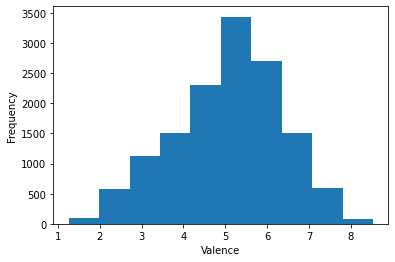

In [25]:
from matplotlib import pyplot as plt
plt.hist(valences)
plt.xlabel('Valence')
plt.ylabel('Frequency')
plt.show()

In [7]:
def count(list1, l, r):
    return len(list(x for x in list1 if l <= x <= r))

In [39]:
7865/(7865 + 2988+ 3347)

0.5538732394366197

In [8]:
count(valences, 1, 4)

2988

In [9]:
count(valences, 4, 6)

7865

In [10]:
count(valences, 6, 9 )

3347

In [11]:
3347-2988

359

In [37]:
sum(df['text'].apply(lambda x : len(x.split(' '))))

48422

In [38]:
count(valences, 1, 9) / sum(df['text'].apply(lambda x : len(x.split(' '))))

0.2873693775556565

In [12]:
import nltk
from nltk import tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [32]:
total = []

In [33]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
import numpy as np

lmtzr = WordNetLemmatizer()

def analyse(s, mode = 'mean'):
    global total
    assert mode == 'mean' or mode == 'median'
    stops = set(stopwords.words("english"))
    anew = './EnglishShortened.csv'
    all_words = []
    found_words = []
    total_words = 0
    v_list = []  # holds valence scores
    a_list = []  # holds arousal scores
    d_list = []  # holds dominance scores

    # search for each valid word's sentiment in ANEW
    s = word_tokenize(s.lower())
    words = pos_tag(s)
    #print(words)
    for index, p in enumerate(words):
      # don't process stops or words w/ punctuation
      w = p[0]
      pos = p[1]
      if w in stops or not w.isalpha():
          continue

      # check for negation in 3 words before current word
      j = index-1
      neg = False
      while j >= 0 and j >= index-3:
          if words[j][0] == 'not' or words[j][0] == 'no' or words[j][0] == 'n\'t':
              neg = True
              break
          j -= 1

      # lemmatize word based on pos
      if pos[0].startswith('N') or pos[0].startswith('V') or pos[0].startswith('RB'):
          lemma = lmtzr.lemmatize(w, pos=pos[0].lower())
      else:
          lemma = w

      #print(lemma)
      all_words.append(lemma)

      if lemma in anew_dict:
          if neg:
              found_words.append("neg-"+lemma)
          else:
              found_words.append(lemma)
          v = float(anew_dict[lemma]['valence'])
          a = float(anew_dict[lemma]['arousal'])
          d = float(anew_dict[lemma]['dominance'])

          if neg:
              # reverse polarity for this word
              v = 5 - (v - 5)
              a = 5 - (a - 5)
              d = 5 - (d - 5)

          v_list.append(v)
          a_list.append(a)
          d_list.append(d)
    
    if len(v_list) == 0:
      print("some problem... setting value to -1")
      return -1
    total = total + all_words
    return np.array(v_list).mean() if mode == 'mean' else np.median(np.array(v_list))

analyse(df['text'][1], 'median')

5.65

In [34]:
df['mean'] = df['text'].apply(lambda x : analyse(x, 'mean'))
df['median'] = df['text'].apply(lambda x : analyse(x, 'median'))

some problem... setting value to -1
some problem... setting value to -1
some problem... setting value to -1
some problem... setting value to -1
some problem... setting value to -1
some problem... setting value to -1
some problem... setting value to -1
some problem... setting value to -1


In [36]:
len(set(total))

3956

In [15]:
df[df['mean'] == -1]

,Unnamed: 0,text,sentiment,text_correct,mean,median
109,109,"*FNA, not FNB",neutral,"*fna, not fnb",-1.0,-1.0
238,238,But isnt atleast any std?,neutral,but isnt atleast any std?,-1.0,-1.0
369,84,Anyone?,neutral,anyone?,-1.0,-1.0
371,86,How are you now?,neutral,how are you now?,-1.0,-1.0


In [16]:
df

,Unnamed: 0,text,sentiment,text_correct,mean,median
0,0,Hello and hope you are doing well.Understand y...,neutral,hello and hope you are doing well.understand y...,5.980000,6.050
1,1,It would be hard to see any significant abnorm...,neutral,it would be hard to see any significant abnorm...,5.479192,5.650
2,2,"Hi James, I, too, go to bed by 10:00, then wa...",neutral,"hi james, i, too, go to bed by 10:00, then wa...",6.048472,6.210
3,3,"Hi, I am suffering from the same sleep problem...",negative,"hi, i am suffering from the same sleep problem...",5.549167,6.045
4,4,"me too, it feels like its morning after 1hour",neutral,"me too, it feels like its morning after 1hour",6.706667,6.410
...,...,...,...,...,...,...
482,197,I just had a similar experience of feeling a d...,neutral,i just had a similar experience of feeling a d...,5.778958,5.640
483,198,Thank you for posting. I saw starting to think...,negative,thank you for posting. i saw starting to think...,5.673738,5.910
484,199,During an induced 4 week coma following a hear...,neutral,during an induced 4 week coma following a hear...,5.849091,6.820
485,200,I have been doing his for years. especially at...,negative,i have been doing his for years. especially at...,5.688000,5.750


In [17]:
def categorize(sentiment):
  # the sentiment is the numeric value we got by doing mean and median
  # set sentiment label
  label = 'neutral'
  if sentiment > 6:
      label = 'positive'
  elif sentiment < 4:
      label = 'negative'
# -4 ---2-----3------4]-----5------[6-------7-----8------4
  return label

In [18]:
median_prediction = df['median'].apply(categorize).tolist()
mean_prediction = df['mean'].apply(categorize).tolist()

In [19]:
from sklearn.metrics import classification_report

print(classification_report(df['sentiment'].tolist(), median_prediction))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       142
     neutral       0.58      0.74      0.65       290
    positive       0.24      0.47      0.32        55

    accuracy                           0.50       487
   macro avg       0.27      0.41      0.32       487
weighted avg       0.37      0.50      0.43       487



In [20]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(df['sentiment'].tolist(), median_prediction))

[[  0 126  16]
 [  8 216  66]
 [  0  29  26]]


In [21]:
print(classification_report(df['sentiment'].tolist(), mean_prediction))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       142
     neutral       0.60      0.86      0.70       290
    positive       0.41      0.47      0.44        55

    accuracy                           0.56       487
   macro avg       0.34      0.44      0.38       487
weighted avg       0.40      0.56      0.47       487



In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(df['sentiment'].tolist(), mean_prediction))

[[  0 139   3]
 [  7 249  34]
 [  0  29  26]]
